In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pickle




In [2]:
credit= pd.read_excel("default of credit card clients.xls",header=1)


In [3]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
credit.shape

(30000, 25)

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [6]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
#pd.plotting.scatter_matrix(credit);

In [8]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [9]:
credit.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [10]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [11]:
credit.shape

(30000, 25)

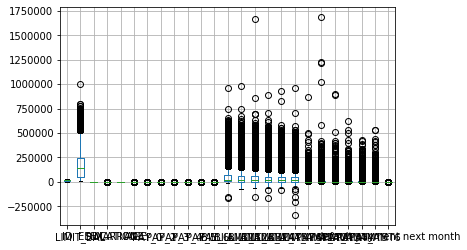

In [12]:
credit.boxplot()

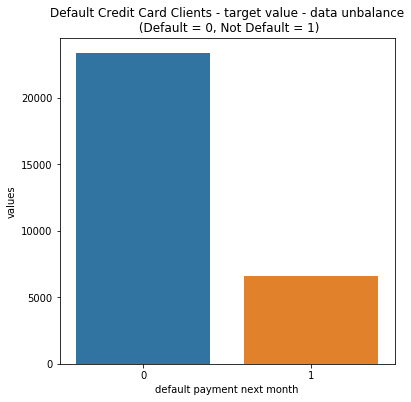

In [13]:
temp = credit["default payment next month"].value_counts()
df = pd.DataFrame({'default payment next month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default payment next month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

A number of 6,636 out of 30,000 (or 22%) of clients will default next month. The data has not a large unbalance with respect of the target value (default.payment.next.month).

## Amount of credit limit¶


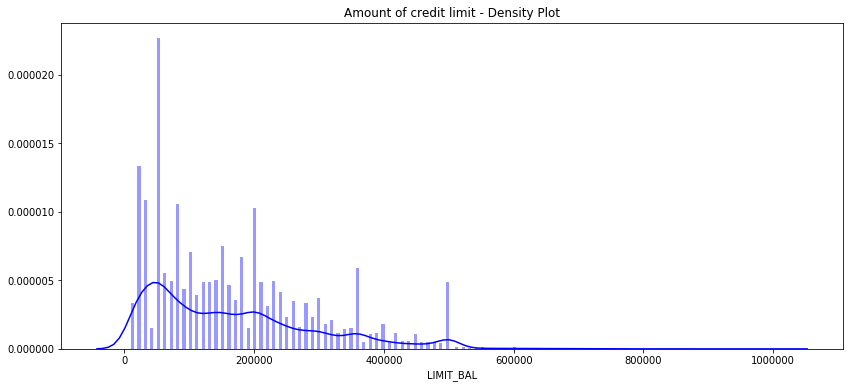

In [14]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(credit['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

Largest group of amount of credit limit is apparently for amount of 50K. Let's verify this.



In [15]:
credit['LIMIT_BAL'].value_counts().shape
credit['LIMIT_BAL'].value_counts().head(5)


50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: LIMIT_BAL, dtype: int64

Indeed, the largest number of credit cards are with limit of 50,000 (3365), followed by 20,000 (1976) and 30,000 (1610).

## Payment Amount :

In [16]:
credit[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()


,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


## Bill Amount :

In [17]:
credit[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [18]:
data = credit.drop('default payment next month',axis=1)


###  Visualizing the Data:

In [19]:
def calculate_percentage(default_count, total_count,label):
    print("Percentage of {} is {} %".format(label,((total_count * 100) / default_count)))
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

No handles with labels found to put in legend.


Percentage of Graduate school Default is 19.23476617855456 %
Percentage of University Default is 23.734853884533145 %
Percentage of High school Default is 25.157616432784216 %
Percentage of Others Default is 5.691056910569106 %


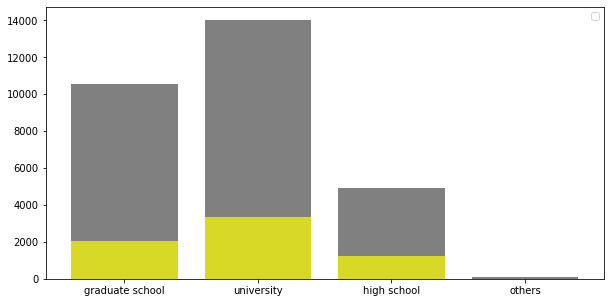

In [20]:
#(1 = graduate school; 2 = university; 3 = high school; 4 = others)
# preparing the vairable for the diagram
_EDUCATION_RANGE= [1,2,3,4]
plt.figure(figsize=(10,5))

school= credit['EDUCATION'][data['EDUCATION']==1].count()
school_default = credit['EDUCATION'][(credit['EDUCATION']==1)&(credit['default payment next month'])].count()

university= credit['EDUCATION'][data['EDUCATION']==2].count()
university_default = credit['EDUCATION'][(credit['EDUCATION']==2)&(credit['default payment next month'])].count()

high_school= credit['EDUCATION'][data['EDUCATION']==3].count()
high_school_default = credit['EDUCATION'][(credit['EDUCATION']==3)&(credit['default payment next month'])].count()

others= credit['EDUCATION'][data['EDUCATION']==4].count()
others_default = credit['EDUCATION'][(credit['EDUCATION']==4)&(credit['default payment next month'])].count()

education_total = [school,university,high_school,others]
default_education_total=  [school_default,university_default,high_school_default,others_default] 


plt.bar(_EDUCATION_RANGE , education_total,color='grey')
plt.bar(_EDUCATION_RANGE , default_education_total,color='yellow', alpha = 0.7)
plt.xticks(_EDUCATION_RANGE,['graduate school','university','high school','others'])
calculate_percentage(school,school_default,"Graduate school Default")
calculate_percentage(university,university_default,"University Default")
calculate_percentage(high_school,high_school_default,"High school Default")
calculate_percentage(others,others_default,"Others Default")


plt.legend()
plt.show()

No handles with labels found to put in legend.


Gender / Default


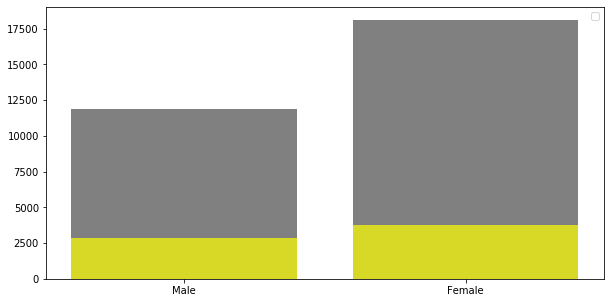

Percentage of Male Default is 24.167227456258413 %
Percentage of Female Default is 20.776280918727917 %


In [21]:
print("Gender / Default")
plt.figure(figsize=(10,5))
_GENDER_RANGE= [0,1]

male= credit['SEX'][data['SEX']==1].count()
male_default = credit['SEX'][(credit['SEX']==1)&(credit['default payment next month']==1)].count()

female=credit['SEX'][data['SEX']==2].count()
female_default = credit['SEX'][(credit['SEX']==2)&(credit['default payment next month']==1)].count()

gender_total = [male,female]
default_gender_total = [male_default,female_default]

plt.bar(_GENDER_RANGE,gender_total, color='grey')
plt.bar(_GENDER_RANGE,default_gender_total, color='yellow',alpha = 0.7)
plt.xticks([0,1],['Male','Female'])

plt.legend()
plt.show()
calculate_percentage(male,male_default,"Male Default")
calculate_percentage(female,female_default,"Female Default")

Marriage / Default


No handles with labels found to put in legend.


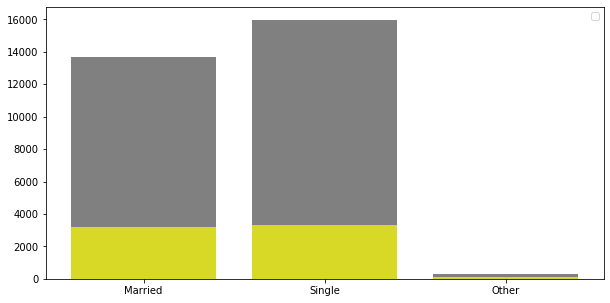

Percentage of Married Default is 23.471703638626547 %
Percentage of Single Default is 20.928338762214985 %
Percentage of Others Default is 26.006191950464395 %


In [22]:
# 1=married, 2=single, 3=others
# preparing the vairable for the diagram
print("Marriage / Default")
_MARRIAGE_RANGE= [1,2,3]
plt.figure(figsize=(10,5))

married= credit['MARRIAGE'][data['MARRIAGE']==1].count()
married_default = credit['MARRIAGE'][(credit['MARRIAGE']==1)&(credit['default payment next month']==1)].count()

single=credit['MARRIAGE'][data['MARRIAGE']==2].count()
single_default = credit['MARRIAGE'][(credit['MARRIAGE']==2)&(credit['default payment next month']==1)].count()

others=credit['MARRIAGE'][data['MARRIAGE']==3].count()
others_default = credit['MARRIAGE'][(credit['MARRIAGE']==3)&(credit['default payment next month']==1)].count()


marriage_total = [married,single,others]
default_marriage_total = [married_default,single_default,others_default]

plt.bar(_MARRIAGE_RANGE,marriage_total, color='grey')
plt.bar(_MARRIAGE_RANGE,default_marriage_total, color='yellow',alpha = 0.7)
plt.xticks([1,2,3],['Married','Single','Other'])
plt.legend()
plt.show()

calculate_percentage(married,married_default,"Married Default")
calculate_percentage(single,single_default,"Single Default")
calculate_percentage(others,others_default,"Others Default")

Age / Default


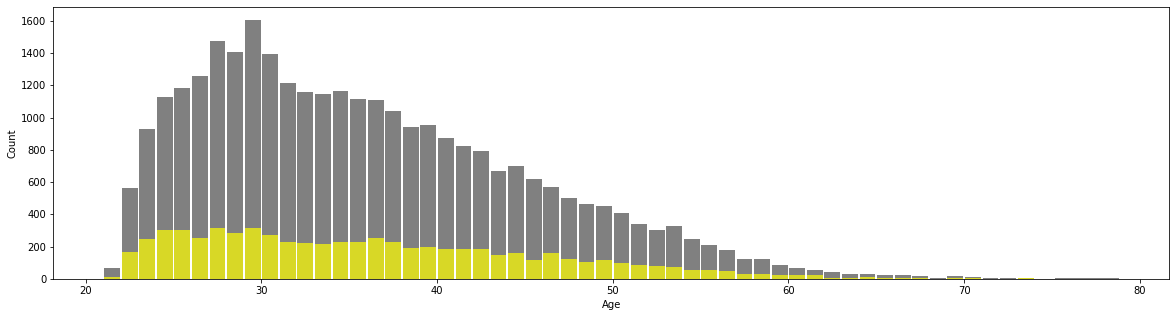

Percentage of 21 is 20.895522388059703 %
Percentage of 22 is 30.178571428571427 %
Percentage of 23 is 26.53061224489796 %
Percentage of 24 is 26.619343389529725 %
Percentage of 25 is 25.463743676222595 %
Percentage of 26 is 20.143312101910826 %
Percentage of 27 is 21.19160460392688 %
Percentage of 28 is 20.298083747338538 %
Percentage of 29 is 19.501557632398754 %
Percentage of 30 is 19.6415770609319 %
Percentage of 31 is 18.816762530813477 %
Percentage of 32 is 19.430051813471504 %
Percentage of 33 is 18.760907504363 %
Percentage of 34 is 19.879518072289155 %
Percentage of 35 is 20.305480682839175 %
Percentage of 36 is 22.924187725631768 %
Percentage of 37 is 21.998078770413063 %
Percentage of 38 is 20.550847457627118 %
Percentage of 39 is 20.859538784067087 %
Percentage of 40 is 21.49425287356322 %
Percentage of 41 is 22.45145631067961 %
Percentage of 42 is 23.299748110831235 %
Percentage of 43 is 22.388059701492537 %
Percentage of 44 is 23.142857142857142 %
Percentage of 45 is 18.80

In [23]:
print("Age / Default")
plt.figure(figsize=(20,5))
plt.hist(data['AGE'], sorted(data['AGE'].unique()),rwidth=0.9, color ='grey')
plt.hist(credit['AGE'][(credit['default payment next month']==1)], sorted(data['AGE'].unique()),rwidth=0.9,color='yellow',alpha = 0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

age_persentage_dataframe = pd.DataFrame(columns=['Age', 'Percentage'])

for x in sorted(data['AGE'].unique()):
    calculate_percentage(
                         credit['AGE'][credit['AGE']==x ].count(),credit['AGE'][(credit['AGE']==x )&(credit['default payment next month']==1)].count(), x
                               )


Limit Balance / Default


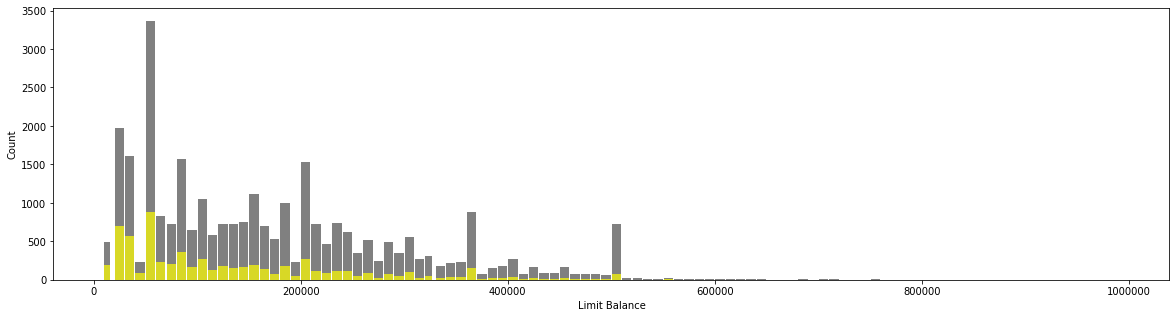

<Figure size 1440x72 with 0 Axes>

In [24]:
#LIMIT_BAL

print("Limit Balance / Default")
plt.figure(figsize=(20,5))
plt.hist(data['LIMIT_BAL'], sorted(data['LIMIT_BAL'].unique()),rwidth=0.9, color ='grey')
plt.hist(credit['LIMIT_BAL'][(credit['default payment next month']==1)], sorted(credit['LIMIT_BAL'].unique()),rwidth=0.9,color='yellow',alpha = 0.7)
plt.xlabel('Limit Balance')
plt.ylabel('Count')
plt.figure(figsize=(20,1))
plt.show()

NameError: name 'pay_status_columns' is not defined

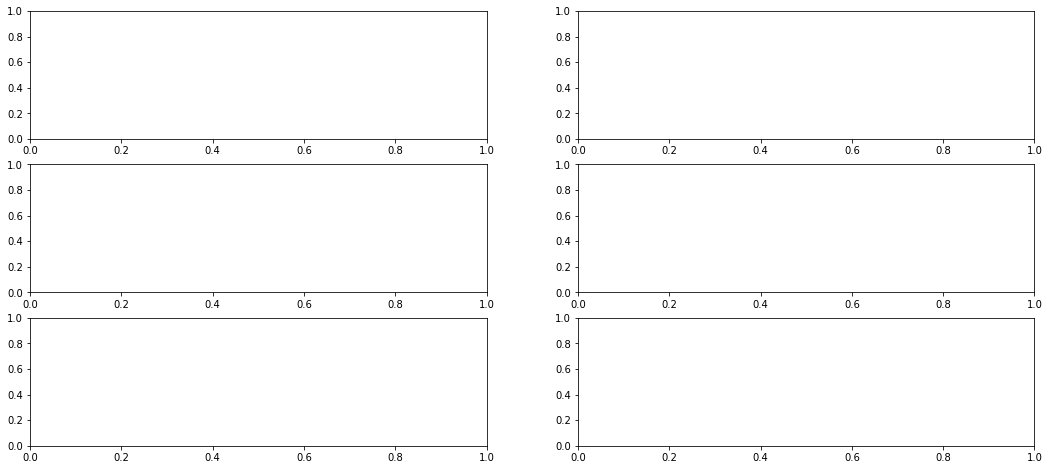

In [25]:
#pay_AMT
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(credit[pay_amt_columns[i]], 30, color ='grey')
    ax[row,col].hist(credit[pay_amt_columns[i]][(credit['default payment next month']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()
# for i in range(0,1):
    
#     plt.hist(dataset[pay_status_columns[i]], sorted(dataset[pay_status_columns[i]].unique()),rwidth=0.9, color ='grey')
#     plt.show()


In [ ]:

# BILL_AMT1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
#(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(credit[bill_atm_columns[i]], 20,rwidth=0.9, color ='grey')
    ax[row,col].hist(credit[bill_atm_columns[i]][(credit['default payment next month']==1)],20,rwidth=0.9,color='yellow',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

after looking at the result from the heat map it's clearly showing corelation between pay column and also between bill amount column...so , we create a new feature for both of them that will have the average. will go with this approache if i need better performance while trainning ( instead of trainning for 12 i would train for 2 features)
I was expecting to see some corrletion between (AGE/MARRIAGE/SEX) but that was not the case

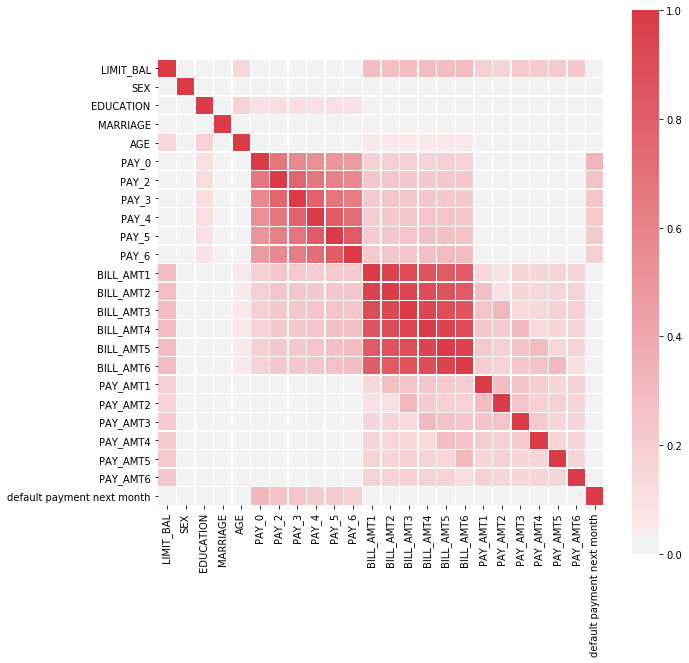

In [26]:
corr = credit.drop('ID',axis=1).corr()
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=0,vmax=1, center=0,
            square=True, linewidths=.5)


## Random Forest


In [27]:
outcome = credit['default payment next month']


In [28]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X = data
Y = outcome

x_train,x_test,y_train,y_test = train_test_split(data,outcome,test_size=0.25,random_state=0)
rfc = RandomForestClassifier(random_state=41)
rfc.fit(x_train,y_train)
score = rfc.score(x_test,y_test)
print ("Score : %{} using {}".format(score*100, 'RandomForestClassifier'))

gbc = GradientBoostingClassifier(random_state=41,n_estimators=10,max_depth=4)
gbc.fit(x_train,y_train)
score = gbc.score(x_test,y_test)
print ("Score : %{} using {}".format(score*100, 'GradientBoostingClassifier'))

abc = AdaBoostClassifier(random_state=41,n_estimators=15)
abc.fit(x_train,y_train)
score = abc.score(x_test,y_test)
print ("Score : %{} using {}".format(score*100, 'AdaBoostClassifier'))

# adding setting the max_leaf_nodes imporved the acccuracy from 78 to 82 
dtc = DecisionTreeClassifier(random_state=41,max_leaf_nodes=3)
dtc.fit(x_train,y_train)
score = dtc.score(x_test,y_test)
print ("Score : %{} using {}".format(score*100, 'DecisionTreeClassifier'))

/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score : %81.10666666666667 using RandomForestClassifier
Score : %81.92 using GradientBoostingClassifier
Score : %82.13333333333334 using AdaBoostClassifier
Score : %82.69333333333333 using DecisionTreeClassifier


In [31]:
#saving model 
pickle.dump(dtc , open('model.pkl','wb'))

In [32]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))


Dropping one month at a time :
To see how much the enhancment that the 6 month data bring to the algorithim so i decide to drop all the data that belong to the 6th month and run Ada Boost Classifier... the accuracy dropped in 0.3% only that was better than what i was expected and that was due to the correlation we found earlier...after that i decide to have a loop and remove month on each loop and the algorithm did fine because my target to see from 2 or 3 month .

In [80]:
from sklearn.feature_selection import f_classif, SelectKBest
import numpy as np
columns_to_drop =['PAY_AMT', 'BILL_AMT','PAY_']
X = data.drop(['ID'],axis=1)
Y = outcome
for i in range(6,0,-1):
    for x in range(0,len(columns_to_drop)):
        X = X.drop(columns_to_drop[x]+str(i),axis=1)
        x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)
    clf = AdaBoostClassifier(random_state=41)
    clf.fit(x_train,y_train)
    current_score = clf.score(x_test,y_test)
    print ("Score : %{} after dropping {}th month".format(current_score*100, i))

Score : %81.97333333333333 after dropping 6th month
Score : %82.32000000000001 after dropping 5th month
Score : %82.30666666666666 after dropping 4th month
Score : %82.42666666666668 after dropping 3th month
Score : %82.64 after dropping 2th month


KeyError: "['PAY_1'] not found in axis"

In [81]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[5,10,15,20], 'learning_rate':[0.3, 0.5,0.75,1]}
X = data.drop(['ID'],axis=1)
for i in range(6,2,-1):
    for x in range(0,len(columns_to_drop)):
        X = X.drop(columns_to_drop[x]+str(i),axis=1)
adaboost = AdaBoostClassifier(random_state=41)
clf = GridSearchCV(adaboost, parameters)
clf.fit(x_train, y_train)
clf.score(x_test,y_test)
clf.best_params_

/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'learning_rate': 0.5, 'n_estimators': 20}

In [82]:

adaboost = AdaBoostClassifier(random_state=41,learning_rate=0.3,n_estimators=5)
adaboost.fit(x_train, y_train)
adaboost.score(x_test,y_test)

0.8269333333333333

## Result : I think the model did pretty well with having data only from the first two month and was able to predict with 82.6% accuracy and that what i was targetting

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html

In [ ]:
app = dash.Dash()

In [ ]:
app.layout=html.Div(children = [dcc.Dropdown(
    options=[
        {'label': 'Amount of credit limit', 'value': 'LIMIT'},
        {'label': 'Payment Amount and Bill Amount : :', 'value': 'Amounts'},
        {'label': 'Visualizing the Data by education', 'value': 'educ'},
        {'label': 'Visualizing the Data by Gender', 'value': 'gender'},
        {'label': 'Visualizing the Data by situation', 'value': 'situation'},
        {'label': 'Visualizing the Data by age', 'value': 'age'},
        {'label': 'Matrix', 'value': 'matrix'}



    ],
    multi=True,
    value="MTL"
)   ]
                   )

In [44]:
app.run_server()

NameError: name 'app' is not defined

## Clustering K-Means

In [45]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [46]:
credit1 = credit.drop(columns=['ID','AGE','SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])

In [6]:
credit1.head()


,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


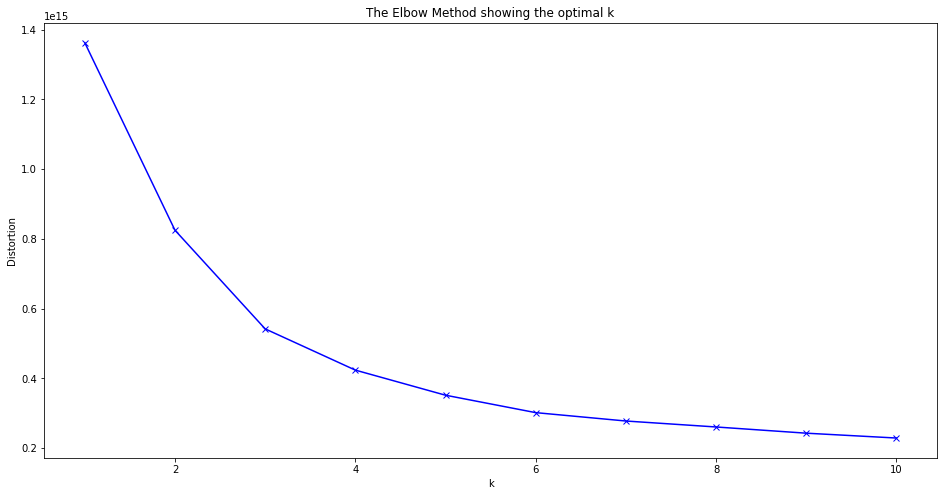

In [7]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(credit1.iloc[:,0:15])
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(credit1)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
pd.crosstab(credit1.iloc[:,-1],kmeans.labels_)

col_0,0,1
default payment next month,,
0,19991,3373
1,5864,772


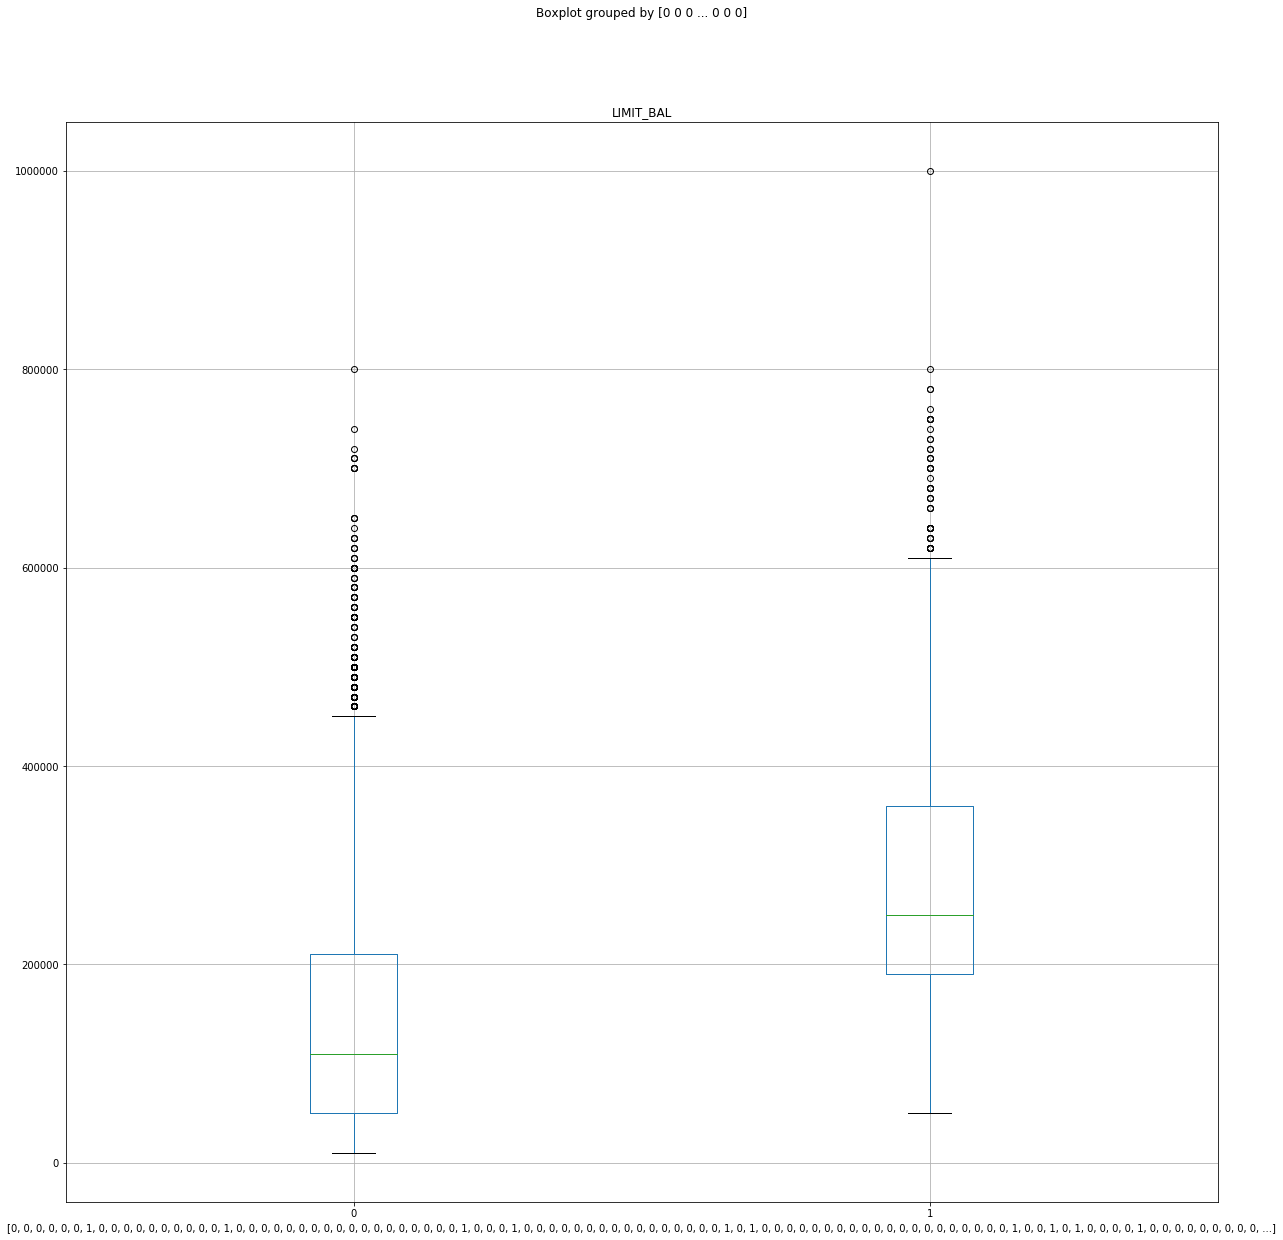

In [11]:
credit1.boxplot(column=['LIMIT_BAL'],by=kmeans.labels_,figsize=(20,20));

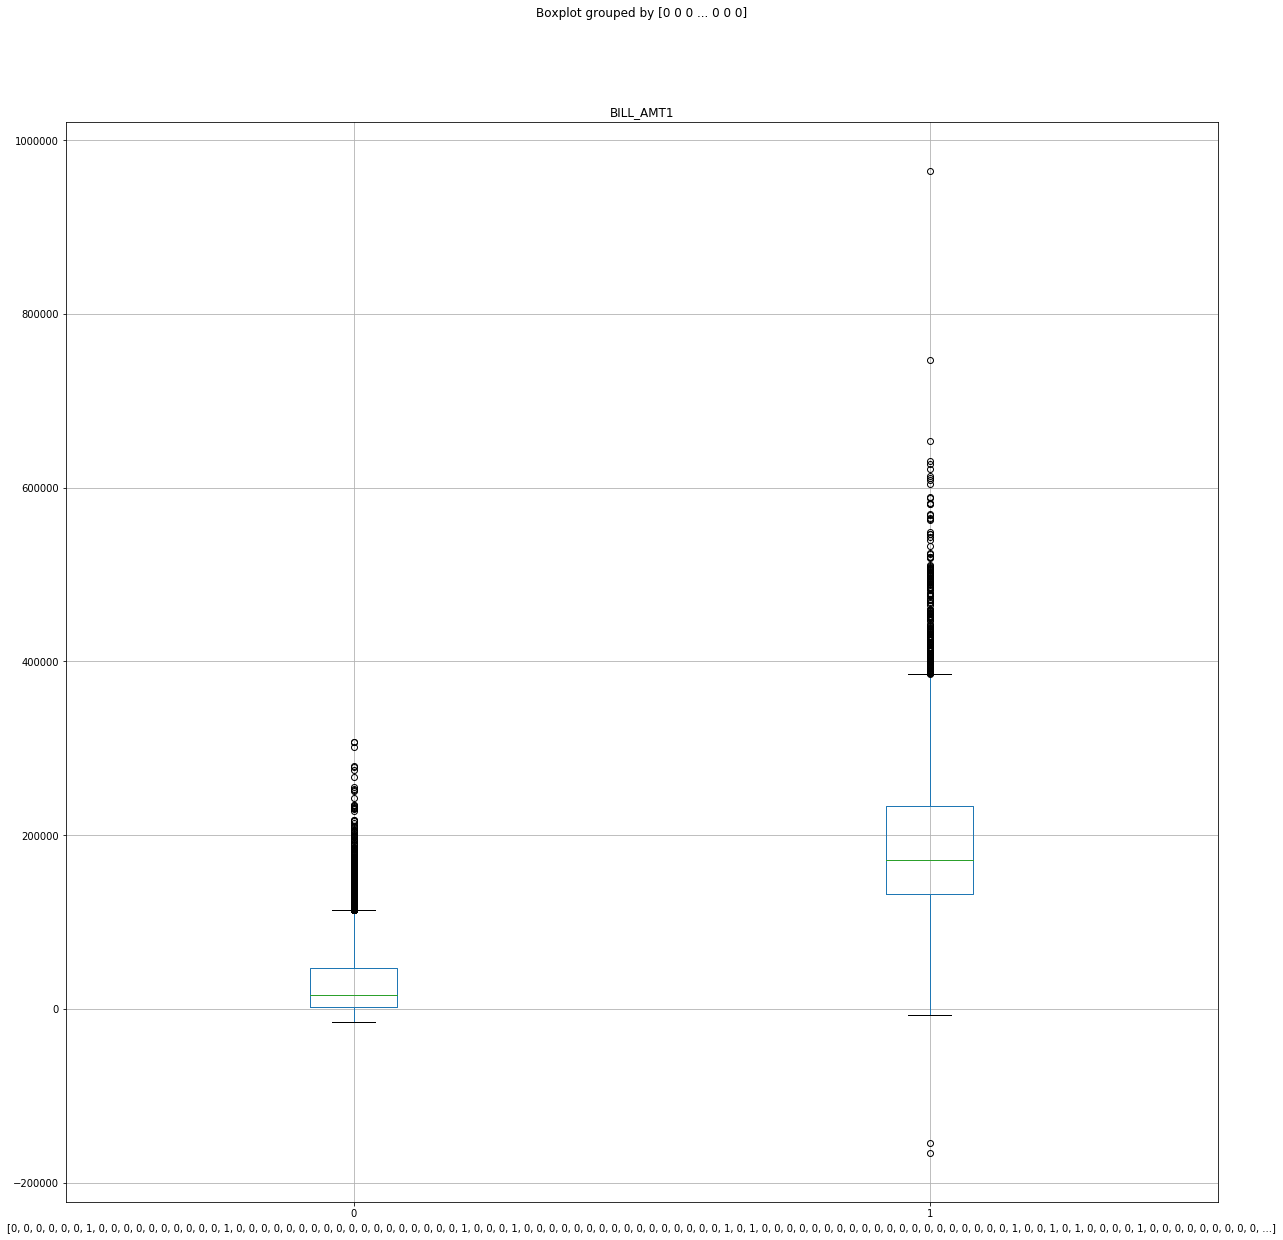

In [12]:
credit1.boxplot(column=['BILL_AMT1'],by=kmeans.labels_,figsize=(20,20));

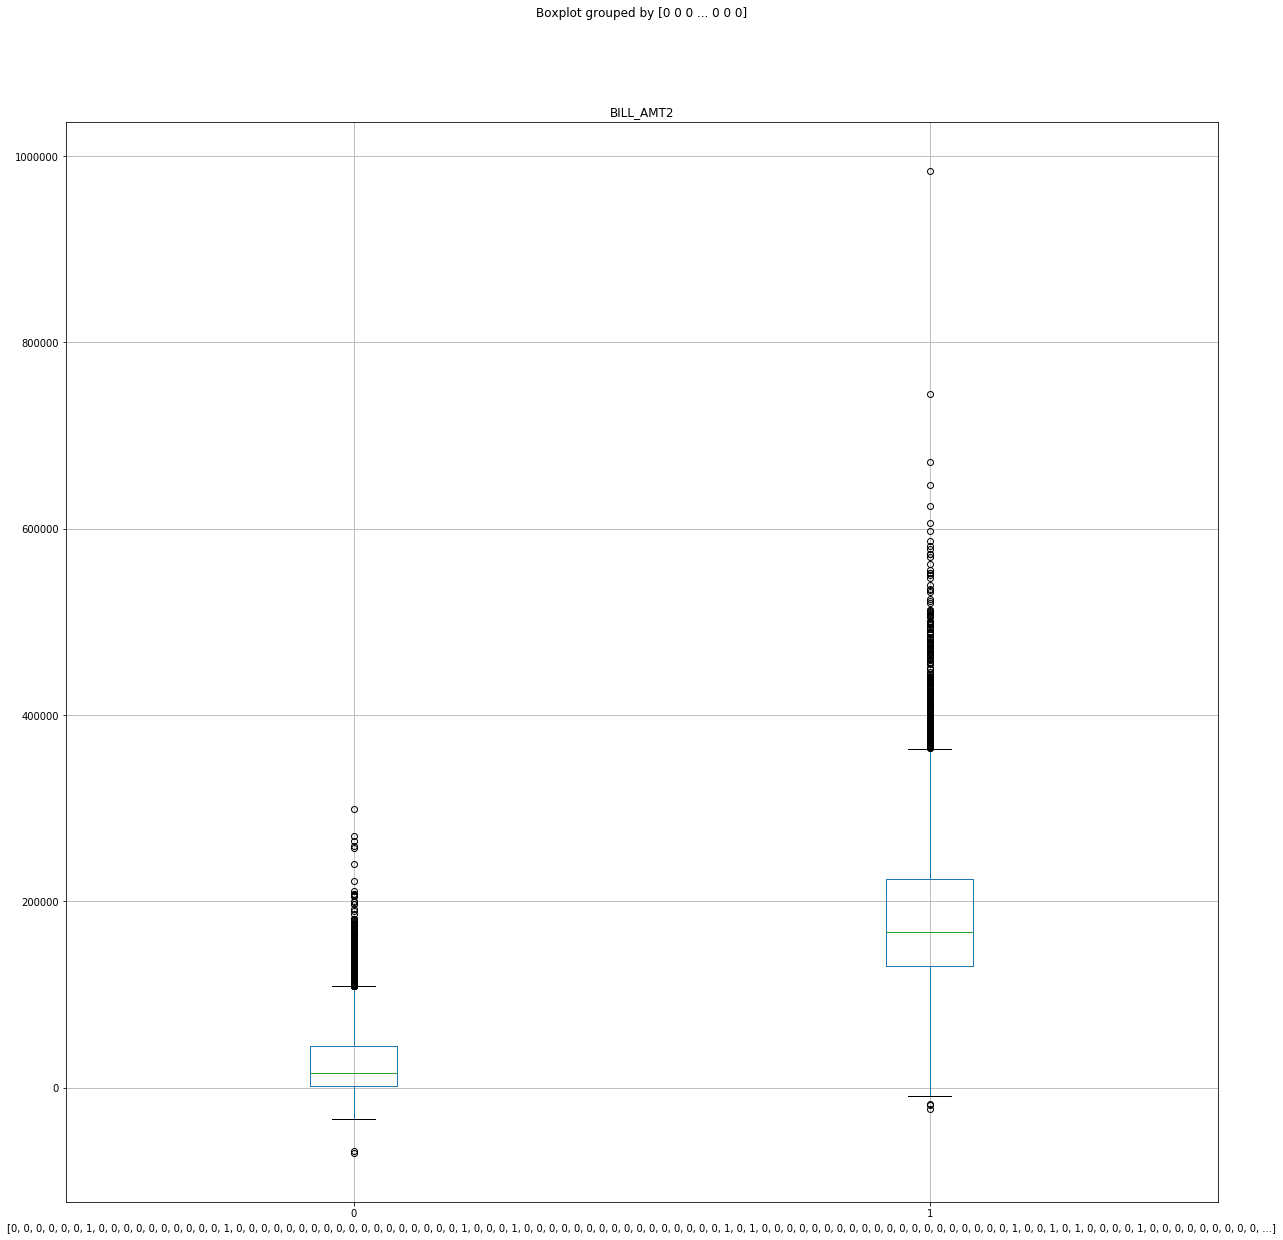

In [29]:
credit1.boxplot(column=['BILL_AMT2'],by=kmeans.labels_,figsize=(20,20));

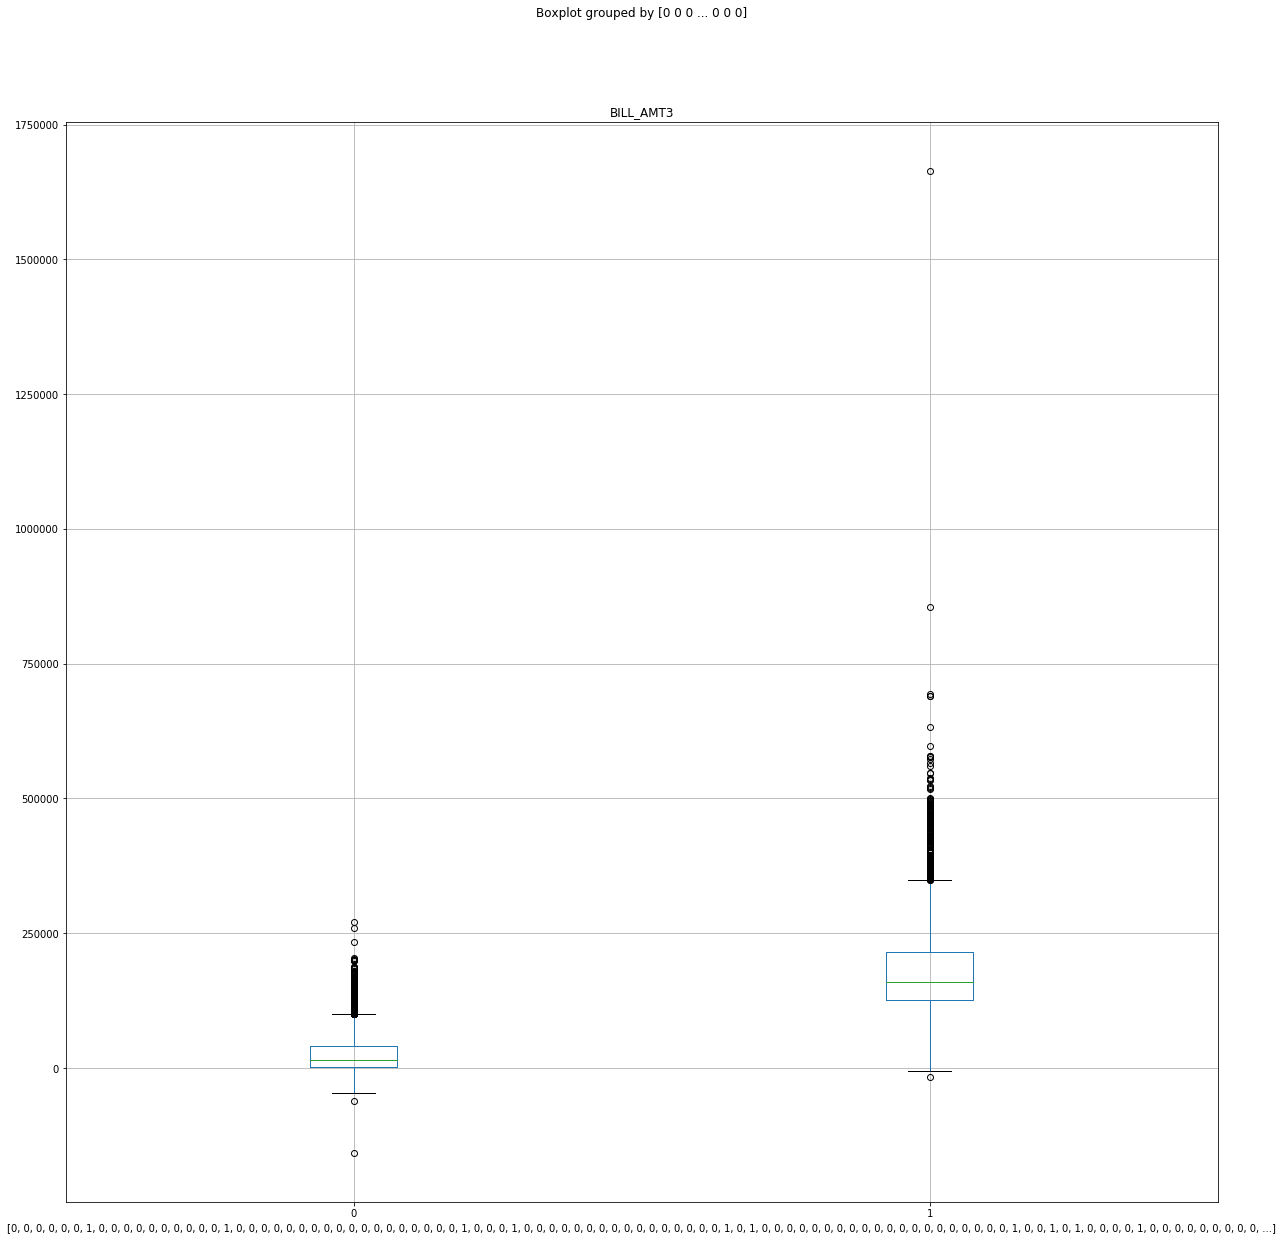

In [30]:
credit1.boxplot(column=['BILL_AMT3'],by=kmeans.labels_,figsize=(20,20));

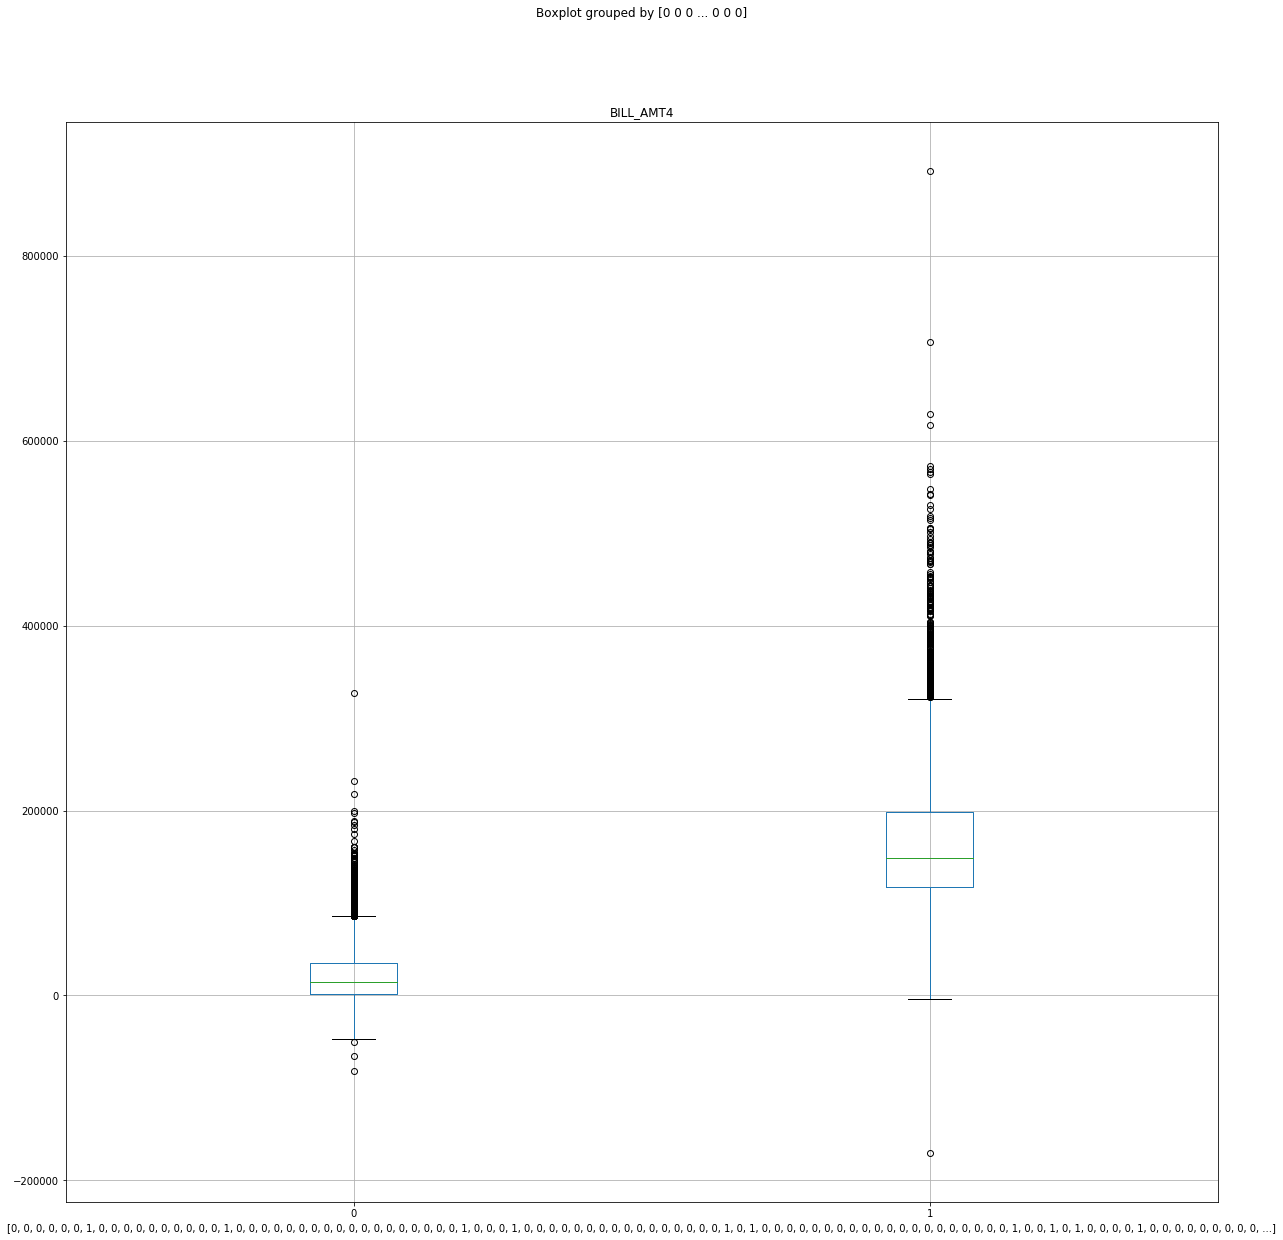

In [31]:
credit1.boxplot(column=['BILL_AMT4'],by=kmeans.labels_,figsize=(20,20));

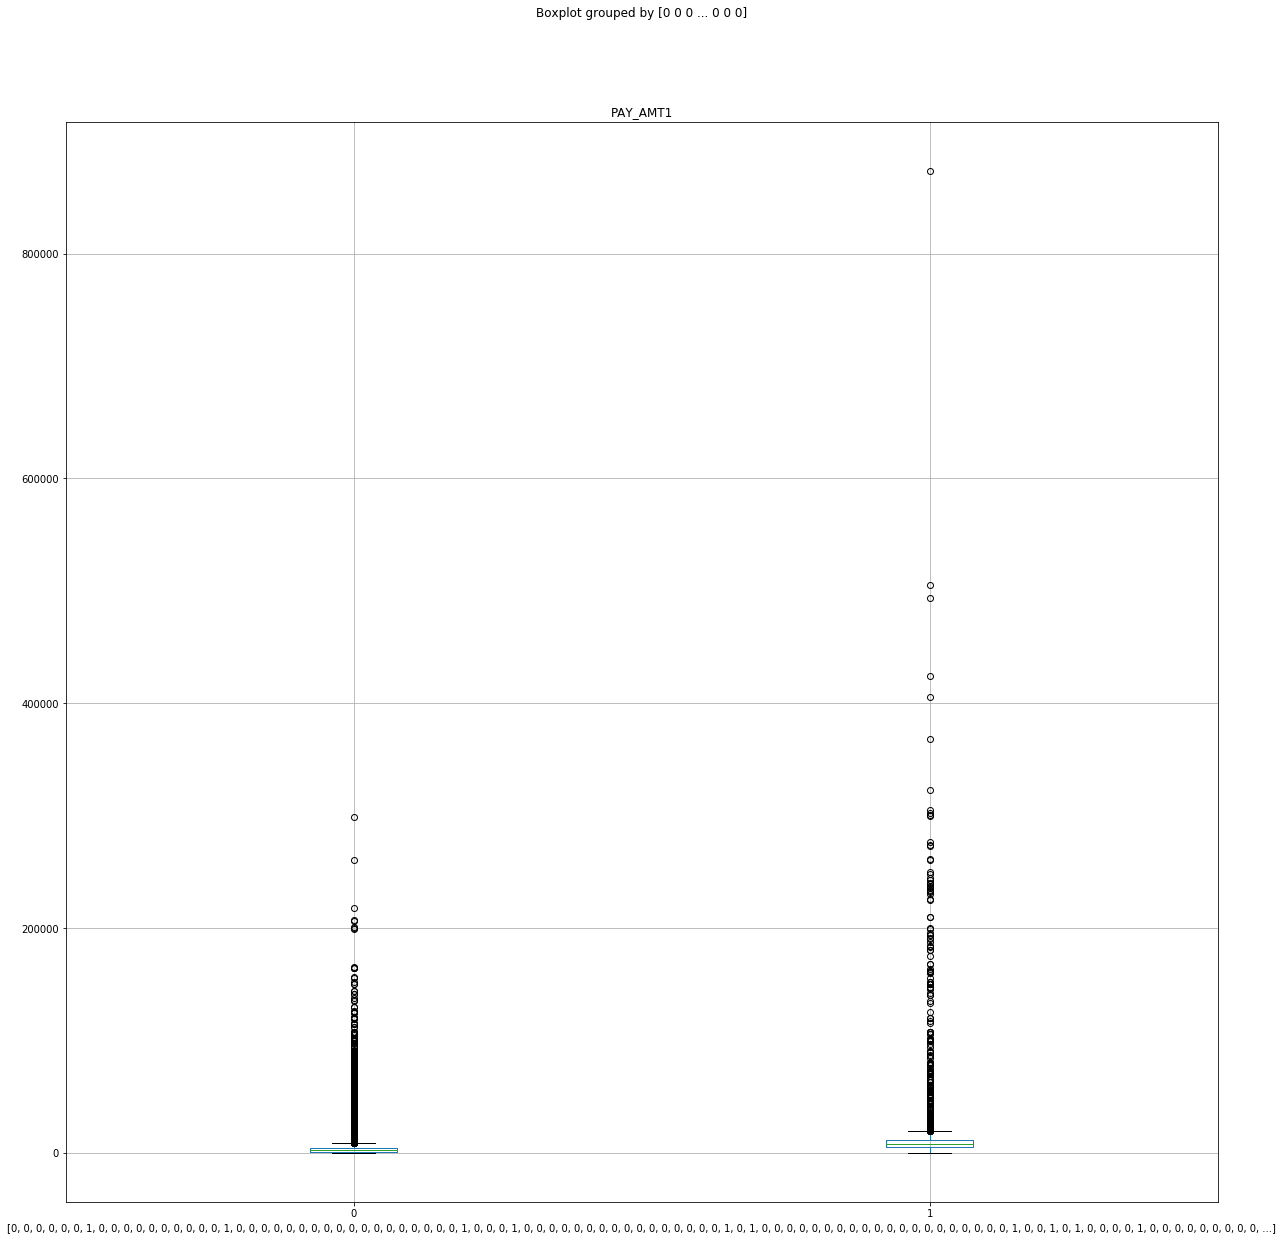

In [33]:
credit1.boxplot(column=['PAY_AMT1'],by=kmeans.labels_,figsize=(20,20));

In [13]:
from sklearn.metrics import roc_curve, auc, adjusted_rand_score
adjusted_rand_score(credit1.iloc[:,-1],kmeans.labels_)

-0.01818867416854098

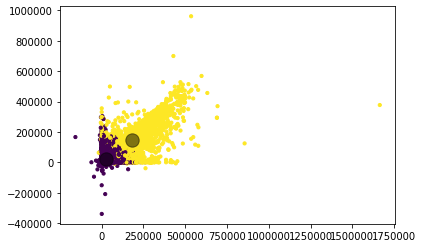

In [14]:
plt.scatter(credit1["BILL_AMT3"], credit1["BILL_AMT6"], c=kmeans.labels_, s=10, cmap='viridis');
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 3], centers[:, 6], c='black', s=180, alpha=0.5);

### ACP

In [15]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation–centrage-réduction
Z = sc.fit_transform(credit1)
print(Z)

[[-1.13672015 -0.64250107 -0.64739923 ... -0.31413612 -0.29338206
   1.87637834]
 [-0.3659805  -0.65921875 -0.66674657 ... -0.31413612 -0.18087821
   1.87637834]
 [-0.59720239 -0.29855966 -0.49389911 ... -0.24868274 -0.01212243
  -0.53294156]
 ...
 [-1.05964618 -0.64722711 -0.64383044 ... -0.18322937 -0.11900109
   1.87637834]
 [-0.67427636 -0.71798186  0.41026929 ...  3.15253642 -0.19190359
   1.87637834]
 [-0.90549825 -0.04473888 -0.00385085 ... -0.24868274 -0.23713013
   1.87637834]]


In [16]:
#moyenne
print(np.mean(Z,axis=0))

[-6.06329801e-17 -1.23160741e-17 -3.78956126e-17  6.25277607e-17
  5.87381995e-17 -2.36847579e-17  1.13686838e-17 -4.73695157e-18
  1.37371596e-17  2.08425869e-17  1.80004160e-17 -1.96583490e-17
 -1.78819922e-17 -8.24229573e-17]


In [11]:
#écart-type
print(np.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [17]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

In [13]:
#affichage des paramètres
print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


In [18]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) 


14


#### Valeurs propres et scree plot

In [19]:
#variance expliquée
print(acp.explained_variance_)

[5.91587405 1.74854649 1.01582747 0.92043107 0.88266053 0.87269435
 0.78123222 0.72636921 0.71217184 0.26401113 0.07101343 0.04105046
 0.02534347 0.02324096]


In [20]:
#valeur corrigée
n = credit1.shape[0]#nombre d'observations
p = credit1.shape[1]#nombre de variables
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[5.91567685 1.7484882  1.01579361 0.92040039 0.88263111 0.87266526
 0.78120618 0.726345   0.7121481  0.26400233 0.07101106 0.04104909
 0.02534263 0.02324019]


In [21]:
#ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n)

[5.91567685 1.7484882  1.01579361 0.92040039 0.88263111 0.87266526
 0.78120618 0.726345   0.7121481  0.26400233 0.07101106 0.04104909
 0.02534263 0.02324019]


In [22]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.42254835 0.12489201 0.07255669 0.06574289 0.06304508 0.06233323
 0.05580044 0.05188179 0.05086772 0.01885731 0.00507222 0.00293208
 0.00181019 0.00166001]


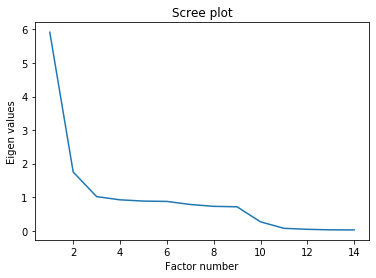

In [23]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

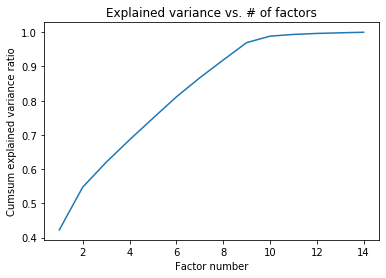

In [24]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

#### Détermination du nombre de facteur à retenir

In [25]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [26]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

    Val.Propre    Seuils
0     5.915677  3.251562
1     1.748488  2.251562
2     1.015794  1.751562
3     0.920400  1.418229
4     0.882631  1.168229
5     0.872665  0.968229
6     0.781206  0.801562
7     0.726345  0.658705
8     0.712148  0.533705
9     0.264002  0.422594
10    0.071011  0.322594
11    0.041049  0.231685
12    0.025343  0.148352
13    0.023240  0.071429


#### Représentation des individus –Outils pour l’interprétation

NameError: name 'n' is not defined

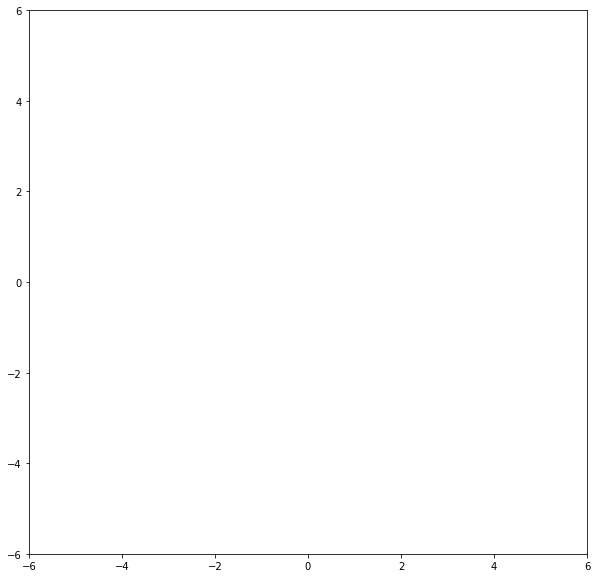

In [15]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(credit1.index[i],(coord[i,0],coord[i,1]))

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [21]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':credit1.index,'d_i':di}))

          ID        d_i
0          0   7.945265
1          1   6.465205
2          2   2.014853
3          3   1.524202
4          4   4.303192
...      ...        ...
29995  29995  14.558417
29996  29996   3.019642
29997  29997   7.358064
29998  29998  38.648923
29999  29999   4.831612

[30000 rows x 2 columns]


In [22]:
#qualité de représentation des individus -COS2
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di

print(pd.DataFrame({'id':credit1.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

          id    COS2_1    COS2_2
0          0  0.480785  0.090425
1          1  0.467459  0.045378
2          2  0.725574  0.011813
3          3  0.188658  0.203330
4          4  0.194412  0.100478
...      ...       ...       ...
29995  29995  0.455569  0.023424
29996  29996  0.806944  0.019625
29997  29997  0.239158  0.011077
29998  29998  0.015657  0.094853
29999  29999  0.072172  0.241271

[30000 rows x 3 columns]


In [24]:
#vérifions la théorie -somme en ligne des cos2 = 1
print(np.sum(cos2,axis=1))

[1. 1. 1. ... 1. 1. 1.]


In [25]:
#contributions aux axes
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':credit1.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

          id     CTR_1         CTR_2
0          0  0.000022  1.369663e-05
1          1  0.000017  5.593008e-06
2          2  0.000008  4.537358e-07
3          3  0.000002  5.908254e-06
4          4  0.000005  8.242839e-06
...      ...       ...           ...
29995  29995  0.000037  6.501244e-06
29996  29996  0.000014  1.129763e-06
29997  29997  0.000010  1.553776e-06
29998  29998  0.000003  6.988860e-05
29999  29999  0.000002  2.222352e-05

[30000 rows x 3 columns]


In [26]:
#vérifions la théorie
print(np.sum(ctr,axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### Représentation des variables

In [27]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 1.65308804e-01  3.72505607e-01  3.83331795e-01  3.88355470e-01
   3.91652601e-01  3.88599718e-01  3.80761961e-01  1.35433766e-01
   1.17035969e-01  1.28282878e-01  1.17152925e-01  1.14006103e-01
   1.05726458e-01 -1.92785191e-02]
 [ 3.06628850e-01 -1.85462548e-01 -1.70729399e-01 -1.25485325e-01
  -1.19928741e-01 -1.06447322e-01 -9.51673533e-02  3.74784516e-01
   3.95738905e-01  3.79643815e-01  3.40274955e-01  2.97540007e-01
   3.16233329e-01 -2.15392149e-01]
 [-3.54270770e-01 -8.05989898e-02 -4.02090984e-02  1.56843911e-02
   2.75899431e-02  3.03203626e-02  8.94525675e-03  2.17354988e-01
   2.93371640e-01  2.32644971e-01  1.01325412e-01 -8.54124896e-02
  -7.80483140e-02  8.08260627e-01]
 [-1.81699565e-01 -3.76347218e-02  3.33672963e-02  7.55346366e-02
   7.66276491e-02  3.22465980e-02 -8.18019751e-02  3.62044071e-01
   3.01786707e-01  1.65394525e-01 -1.49497328e-01 -6.27321899e-01
  -3.22397297e-01 -4.19306723e-01]
 [ 2.18166535e-02  3.73616888e-02  7.58129612e-02  1.13798025e-01
  

In [29]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [30]:
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs 
print(corvar)

[[ 4.02066792e-01  4.05456593e-01 -3.57057417e-01 -1.74318020e-01
   2.04964077e-02 -8.04683734e-02  1.53388078e-01  1.34338755e-01
  -6.83678463e-01 -1.31213965e-02 -1.60389764e-03  3.02805369e-03
  -1.02415601e-04  4.95716564e-04]
 [ 9.06014264e-01 -2.45237892e-01 -8.12329707e-02 -3.61058113e-02
   3.51007272e-02 -3.99455554e-02  3.59091239e-03  4.58055526e-03
   2.27213832e-02  2.90758384e-01  1.10857878e-01 -8.77469835e-02
  -2.92234966e-02 -4.82991294e-02]
 [ 9.32345897e-01 -2.25756188e-01 -4.05253778e-02  3.20117499e-02
   7.12251013e-02 -2.71659685e-02 -3.17046120e-02 -1.15471295e-01
  -7.59405114e-03  1.98692989e-01  1.02450202e-02  6.98418215e-02
   5.23814320e-02  9.84133032e-02]
 [ 9.44564561e-01 -1.65929763e-01  1.58077624e-02  7.24660421e-02
   1.06911480e-01  8.90151205e-02 -1.05361016e-01  8.30569488e-02
   9.64572571e-04  6.30345161e-02 -1.29151492e-01  1.00497298e-01
  -1.36929815e-02 -8.04309700e-02]
 [ 9.52583899e-01 -1.58582270e-01  2.78069620e-02  7.35146509e-02
  

In [31]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':credit1.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

                            id     COR_1     COR_2
0                    LIMIT_BAL  0.402067  0.405457
1                    BILL_AMT1  0.906014 -0.245238
2                    BILL_AMT2  0.932346 -0.225756
3                    BILL_AMT3  0.944565 -0.165930
4                    BILL_AMT4  0.952584 -0.158582
5                    BILL_AMT5  0.945159 -0.140756
6                    BILL_AMT6  0.926096 -0.125840
7                     PAY_AMT1  0.329404  0.495579
8                     PAY_AMT2  0.284657  0.523287
9                     PAY_AMT3  0.312012  0.502005
10                    PAY_AMT4  0.284941  0.449947
11                    PAY_AMT5  0.277288  0.393438
12                    PAY_AMT6  0.257150  0.418157
13  default payment next month -0.046890 -0.284814


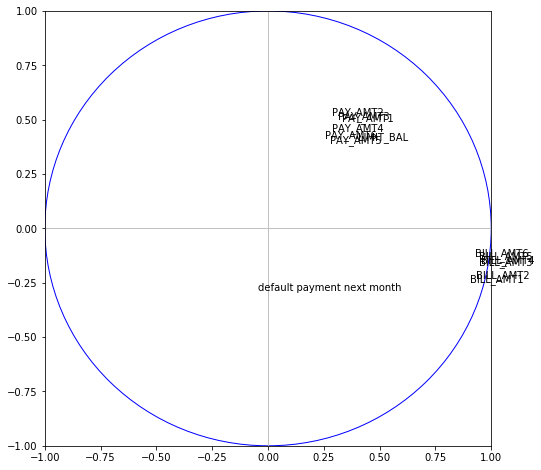

In [34]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes(noms des variables)
for j in range(p):
    plt.annotate(credit1.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

#### Qualité  de  représentation  des  variables  (COS²).  

In [35]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':credit1.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

                            id    COS2_1    COS2_2
0                    LIMIT_BAL  0.161658  0.164395
1                    BILL_AMT1  0.820862  0.060142
2                    BILL_AMT2  0.869269  0.050966
3                    BILL_AMT3  0.892202  0.027533
4                    BILL_AMT4  0.907416  0.025148
5                    BILL_AMT5  0.893325  0.019812
6                    BILL_AMT6  0.857653  0.015836
7                     PAY_AMT1  0.108507  0.245599
8                     PAY_AMT2  0.081029  0.273829
9                     PAY_AMT3  0.097351  0.252009
10                    PAY_AMT4  0.081192  0.202452
11                    PAY_AMT5  0.076888  0.154794
12                    PAY_AMT6  0.066126  0.174855
13  default payment next month  0.002199  0.081119


#### Contribution des variables aux axes (CTR)

In [36]:
#contributions
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':credit1.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

                            id     CTR_1     CTR_2
0                    LIMIT_BAL  0.027327  0.094021
1                    BILL_AMT1  0.138760  0.034396
2                    BILL_AMT2  0.146943  0.029149
3                    BILL_AMT3  0.150820  0.015747
4                    BILL_AMT4  0.153392  0.014383
5                    BILL_AMT5  0.151010  0.011331
6                    BILL_AMT6  0.144980  0.009057
7                     PAY_AMT1  0.018342  0.140463
8                     PAY_AMT2  0.013697  0.156609
9                     PAY_AMT3  0.016456  0.144129
10                    PAY_AMT4  0.013725  0.115787
11                    PAY_AMT5  0.012997  0.088530
12                    PAY_AMT6  0.011178  0.100004
13  default payment next month  0.000372  0.046394


## Supervised learning

In [21]:
#on choisi les variable non corrélées
y = credit.drop(columns=['ID','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5'
                        ,'BILL_AMT6','default payment next month'],axis=1 )
y;

In [22]:
X_train, X_test, y_train, y_test = train_test_split(y, outcome, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Text(0, 0.5, 'Erreur')

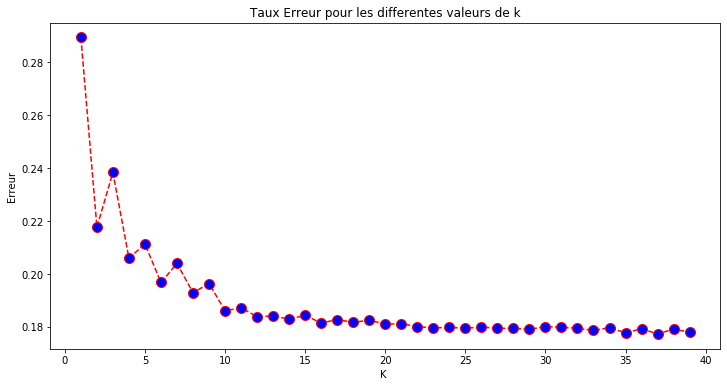

In [23]:
from sklearn.neighbors import KNeighborsClassifier
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [18]:
knn = KNeighborsClassifier(37)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

NameError: name 'KNeighborsClassifier' is not defined

In [114]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.82


In [115]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

[[5666  202]
 [1128  504]]


In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      5868
           1       0.71      0.31      0.43      1632

    accuracy                           0.82      7500
   macro avg       0.77      0.64      0.66      7500
weighted avg       0.81      0.82      0.79      7500



In [117]:
#Les arbres de décision: Appliquer CART et Random Forest

In [118]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

In [119]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

C:\Users\AsuS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [120]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 0.82
Accuracy of Random Forest classifier on test set: 0.82


In [121]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_rfc))

[[5603  265]
 [1337  295]]


In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      5868
           1       0.53      0.18      0.27      1632

    accuracy                           0.79      7500
   macro avg       0.67      0.57      0.57      7500
weighted avg       0.75      0.79      0.74      7500



In [123]:
#Affichage avec la bibliothèque graphique intégrée à Notebook
%matplotlib inline

from sklearn.metrics import roc_curve, auc

In [124]:
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_dtc) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_rfc) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_knn)
roc_auc3 = auc(fpr3, tpr3)

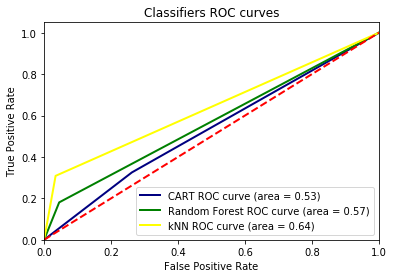

In [125]:
plt.figure() 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='CART ROC curve (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

Le meilleur algo supérvisé est knn